# Grupo 4 🐼
## (Avalos - Espinoza - Garay - Humbert  - Stremel)
### Objetivo: analizar el impacto de factores socioeconómicos y de estilo de vida en el riesgo de infarto, y cómo estos factores pueden variar según diferentes regiones geográficas y demográficas.
#### Subobjetivos
* **Identificar factores de riesgo clave**: Determinar cuáles de las variables (como diabetes, historial familiar, tabaquismo, obesidad, etc.) tienen una mayor influencia en el riesgo de infarto.
* **Evaluar diferencias regionales**: Investigar cómo varían estos factores de riesgo según el país, continente y hemisferio.
* **Impacto socioeconómico**: Analizar la relación entre el nivel de ingresos y el riesgo de infarto.
* **Estilo de vida y salud**: Evaluar cómo las variables relacionadas con el estilo de vida (ejercicio, consumo de alcohol, dieta, horas de sueño, etc.) afectan el riesgo de infarto.
* **Desigualdades de salud**: Identificar posibles desigualdades en el riesgo de infarto según el sexo y la edad.

In [36]:
#importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
#importo el dataset > heart_attack_prediction_dataset 
df = pd.read_csv('heart_attack_prediction_dataset.csv', delimiter=',')

In [38]:
hap = df

In [39]:
#visualizamos el dataframe > filas&columnas para inspeccionar 
hap.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [40]:
#cantidad de filas y columnas
num_filas, num_columnas = hap.shape
print("Número de filas:", num_filas)
print("Número de columnas:", num_columnas)

Número de filas: 8763
Número de columnas: 26


In [41]:
# Eliminamos filas con valores nulos para limpieza inicial
hap = hap.dropna()

In [42]:
#Chequeamos que los tipos de datos sean correctos
hap.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

In [43]:
#reemplazamos nombres de columnas en español 
hap.columns = ['ID Paciente', 'Edad', 'Sexo', 'Colesterol', 'Presión Arterial', 'Ritmo Cardíaco' , 'Diabetes', 'Historial Familiar', 'Fumar', 'Obesidad', 'Consumo de Alcohol', 'Horas de ejercicio por semana', 'Dieta','Problemas Cardíacos Previos','Uso de Medicamentos', 'Nivel de Estrés', 'Horas de Sedentarismo por Día', 'Ingreso', 'IMC', 'Triglicéridos', 'Días de Actividad Física por Semana','Horas de Sueño por Día', 'País', 'Continente', 'Hemisferio', 'Riesgo de Ataque Cardíaco'] #reemplazo directo
hap.columns

Index(['ID Paciente', 'Edad', 'Sexo', 'Colesterol', 'Presión Arterial',
       'Ritmo Cardíaco', 'Diabetes', 'Historial Familiar', 'Fumar', 'Obesidad',
       'Consumo de Alcohol', 'Horas de ejercicio por semana', 'Dieta',
       'Problemas Cardíacos Previos', 'Uso de Medicamentos', 'Nivel de Estrés',
       'Horas de Sedentarismo por Día', 'Ingreso', 'IMC', 'Triglicéridos',
       'Días de Actividad Física por Semana', 'Horas de Sueño por Día', 'País',
       'Continente', 'Hemisferio', 'Riesgo de Ataque Cardíaco'],
      dtype='object')

#### >> Empezamos a visualizar los datos para analizarlos mejor 

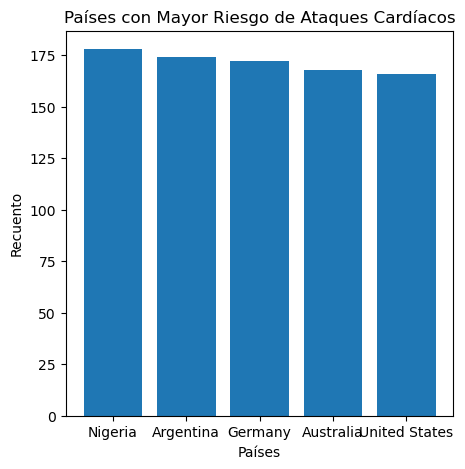

In [44]:
# Países con mayor Riesgo de Ataques Cardíacos
# 1. contar la cantidad de paises totales para mostrar en 'Y'
# 2. sumar la cantidad de 'Riesgo de Ataque Cardíaco' por 'País' 
# 3. mostrar los paises que tienen mayores valores en un top 5

count_country = hap["País"].value_counts()
sum_har = hap.groupby("País")["Riesgo de Ataque Cardíaco"].sum()
top_countries = sum_har.nlargest(5) # muestra el top 5 valores máx

plt.bar(top_countries.index,top_countries.values)
plt.xlabel("Países")
plt.ylabel("Recuento")
plt.title("Países con Mayor Riesgo de Ataques Cardíacos")
plt.show()

#### >> A partir del gráfico anterior, notamos que Argentina está en el 2do puesto de los países con mayor riesgo de ataques cardíacos. Vamos a seguir filtrando los datos a partir de Argentina para seguir analizando el resto de las variables

In [45]:
#Filtrar datos por país
data_arg = hap[hap['País'] == 'Argentina']

#Inspeccionar el subconjunto filtrado
print(data_arg.head())

   ID Paciente  Edad    Sexo  Colesterol Presión Arterial  Ritmo Cardíaco  \
0      BMW7812    67    Male         208           158/88              72   
30     SLE3369    27  Female         135           120/77              49   
36     IUJ5442    27  Female         263          127/109              83   
37     BSV5917    29  Female         201           134/60              86   
46     QWD3129    51    Male         197          106/106              79   

    Diabetes  Historial Familiar  Fumar  Obesidad  ...  \
0          0                   0      1         0  ...   
30         1                   1      0         0  ...   
36         0                   1      0         0  ...   
37         0                   0      0         1  ...   
46         1                   1      1         1  ...   

    Horas de Sedentarismo por Día  Ingreso        IMC  Triglicéridos  \
0                        6.615001   261404  31.251233            286   
30                       9.120329    71276  

#### >> Según investigaciones, existe una predisposición masculina a sufrir infartos debido a la forma de afrontar el estrés, un aumento de la presión arterial y una intensificación de los malos hábitos alimentarios. El siguiente gráfico demuestra esta propensión a sufrir problemas cardíacos en los hombres, ya que en la encuesta, más de la mitad de ellos son propensos.

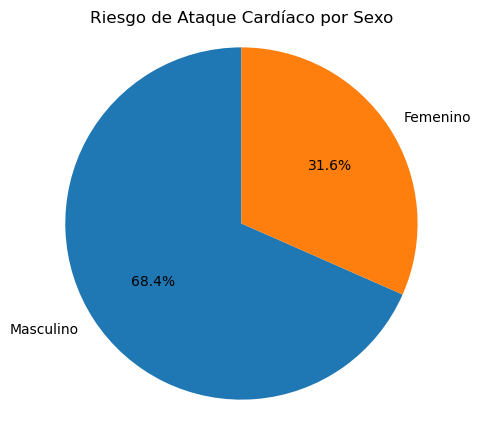

In [46]:
male_risk = data_arg[(data_arg['Sexo'] == 'Male') & (data_arg['Riesgo de Ataque Cardíaco'] == 1)].shape[0]
female_risk = data_arg[(data_arg['Sexo'] == 'Female') & (data_arg['Riesgo de Ataque Cardíaco'] == 1)].shape[0]

sex = ["Masculino", "Femenino"]
data = [male_risk, female_risk]


plt.pie(data, labels=sex, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.rcParams['figure.figsize'] = (5, 5)
plt.title('Riesgo de Ataque Cardíaco por Sexo')
plt.show()

#### >> Entre los factores de riesgo de un ataque cardíaco, se incluyen los siguientes: Edad. Los hombres mayores de 45 años y las mujeres mayores de 55 años tienen una mayor probabilidad de tener un ataque cardíaco que los hombres y las mujeres más jóvenes.

In [55]:
#Crear categorías de edades para mostrar en el gráfico
bins = range(0,101,10) #rango de 0 a 100, agrupando de 10 en 10 años
labels = [f'{i}-{i+9}' for i in range (0,100,10)]

#Definimos data_risk_1 para los datos en Argentina con riesgo de infarto = 1
data_arg_risk_1 = data_arg[data_arg['Riesgo de Ataque Cardíaco'] == 1]

#Creamos una nueva columna en el Dataframe para las categorías de edad usando pd.cut
data_arg_risk_1['Categoría de Edad'] = pd.cut(data_arg_risk_1['Edad'], bins=bins, labels=labels, right=False)

#Mostrar el dataframe resultante
print(data_arg_risk_1)

     ID Paciente  Edad    Sexo  Colesterol Presión Arterial  Ritmo Cardíaco  \
30       SLE3369    27  Female         135           120/77              49   
101      SIQ8677    39    Male         326          155/104              47   
124      ELD0719    60    Male         338           149/69              96   
176      PQR7571    41    Male         178           123/91              64   
192      KLT7600    53    Male         136           135/92              65   
...          ...   ...     ...         ...              ...             ...   
8414     KKQ7177    49    Male         192           105/90              71   
8415     RCX4722    55    Male         332           117/77             108   
8469     QJM4342    83    Male         265           156/88              50   
8603     AVD8579    86    Male         293          160/107              92   
8754     LZM3606    80  Female         383           153/96              91   

      Diabetes  Historial Familiar  Fumar  Obesidad

C:\Users\guillermina.humbert\AppData\Local\Temp\ipykernel_22768\1703004372.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_arg_risk_1['Categoría de Edad'] = pd.cut(data_arg_risk_1['Edad'], bins=bins, labels=labels, right=False)


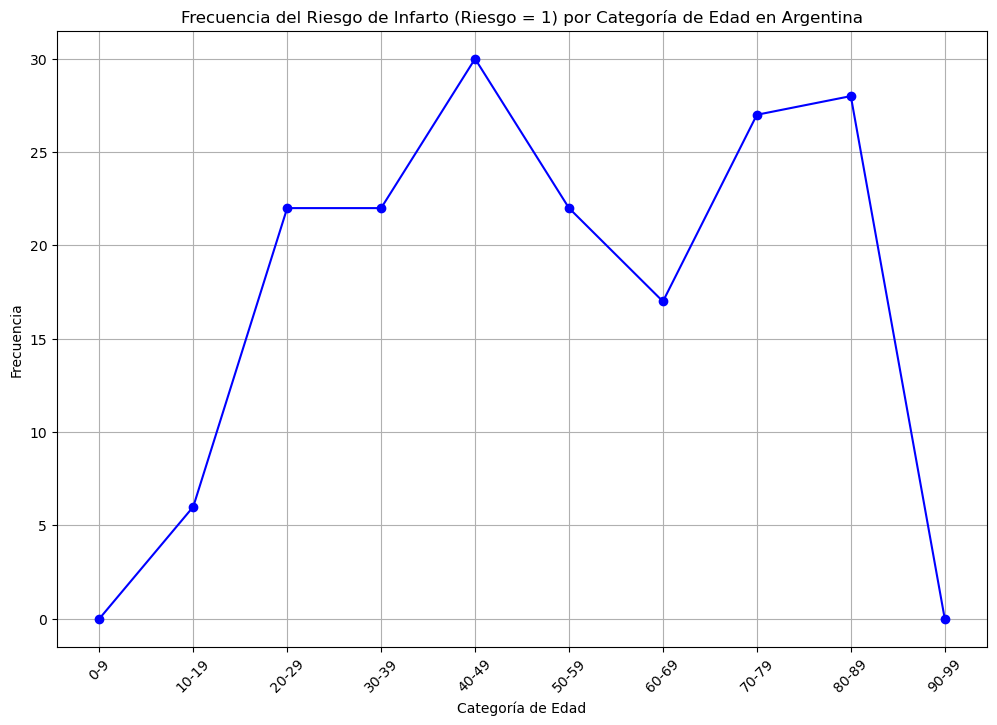

In [58]:
#Calcular la frecuencia del riesgo de infarto por categoría de edad
freq_por_edad = data_arg_risk_1['Categoría de Edad'].value_counts().sort_index()

#Visualización de la frecuencia del riesgo de infarto por categoría de edad con gráfico de línea continua
plt.figure(figsize=(12, 8))
plt.plot(freq_por_edad.index, freq_por_edad.values, marker='o', color='blue', linestyle='-')
plt.xlabel('Categoría de Edad')
plt.ylabel('Frecuencia')
plt.title('Frecuencia del Riesgo de Infarto (Riesgo = 1) por Categoría de Edad en Argentina')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()